In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
d= pd.read_csv("C:\\Users\\Admin\\Desktop\\insurance.csv")        # read the data and storing in data frame

In [5]:
d  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [6]:
# step 1 was data collecting and loading :- Already done see above
# Step 2 Understanding the data Structure 
d.shape

(1338, 7)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
d.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
# Univariate Analysis
d.describe()   

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#Bivariare and Multivariate Analysis
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

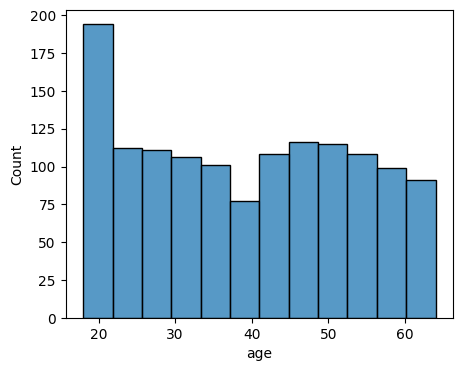

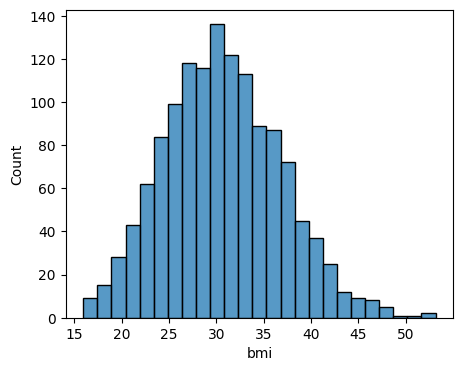

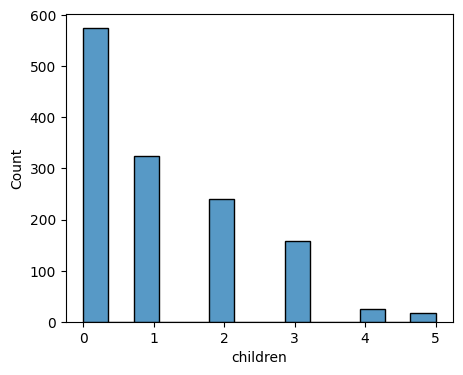

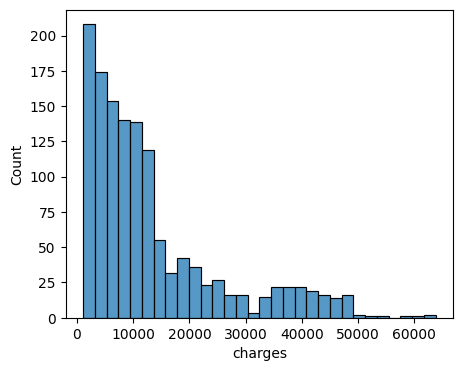

In [13]:
num_col=['age', 'bmi', 'children', 'charges']
for col in num_col:
    plt.figure(figsize=(5,4))
    sns.histplot(d[col])

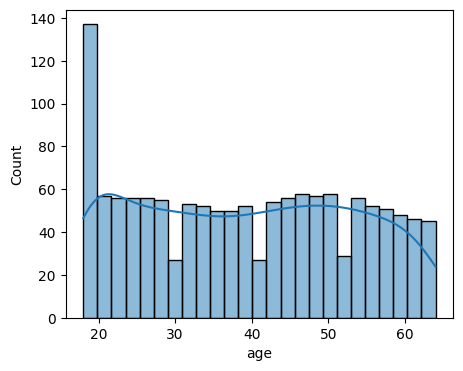

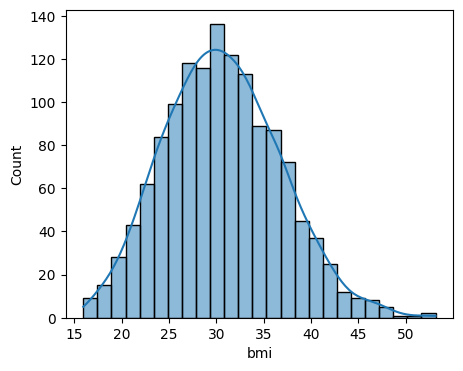

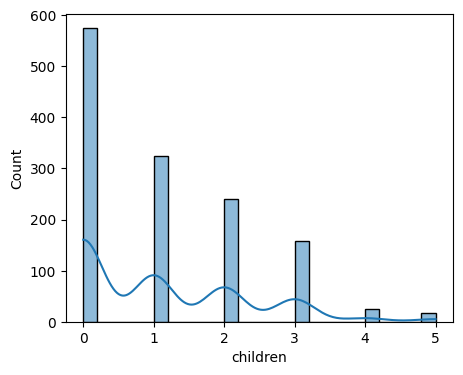

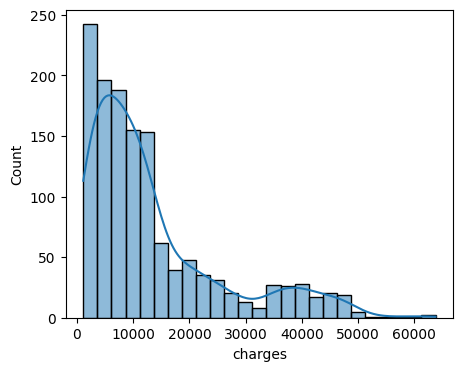

In [14]:
for col in num_col:
    plt.figure(figsize=(5,4))
    sns.histplot(d[col],kde=True,bins =25)

<Axes: xlabel='children', ylabel='count'>

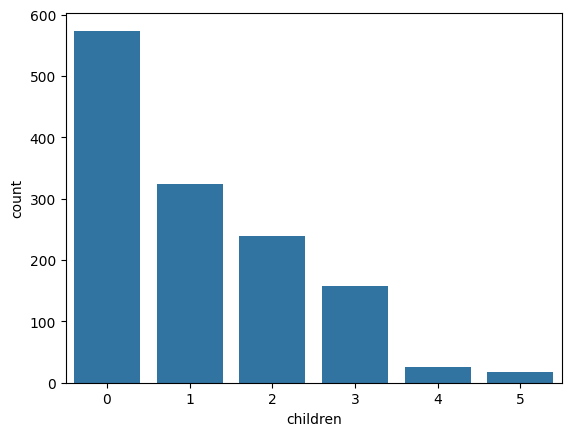

In [15]:
sns.countplot(x=d['children'])

<Axes: >

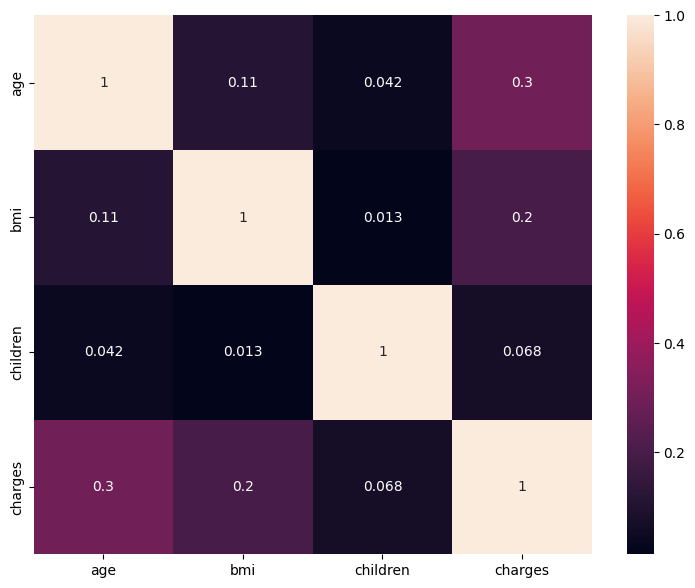

In [19]:
plt.figure(figsize=(9,7))
sns.heatmap(d.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing

In [67]:
d_new=d.copy()

In [68]:
d_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
d_new.shape

(1338, 7)

In [70]:
d_new.drop_duplicates(inplace=True)

In [71]:
d_new.shape

(1337, 7)

In [72]:
d_new.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [73]:
d_new.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [74]:
d_new['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [75]:
d_new['sex']=d_new['sex'].map({"male":0,"female":1})

In [76]:
d_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [77]:
d_new['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [78]:
d_new['smoker']=d_new['smoker'].map({'no':0,'yes':1})

In [79]:
d_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [80]:
d_new.rename(columns={
    'sex':'is_fem',
    'smoker':'smoker'},inplace=True)

In [81]:
d_new.head(10)

,age,is_fem,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [82]:
d_new=pd.get_dummies(d_new,columns=['region'],drop_first=True)

In [83]:
d_new.head(10)

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
5,31,1,25.740,0,0,3756.62160,False,True,False
6,46,1,33.440,1,0,8240.58960,False,True,False
7,37,1,27.740,3,0,7281.50560,True,False,False
8,37,0,29.830,2,0,6406.41070,False,False,False
9,60,1,25.840,0,0,28923.13692,True,False,False


In [84]:
d_new

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False
1334,18,1,31.920,0,0,2205.98080,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,True


In [85]:
d_new = d_new.astype(int)

In [86]:
d_new

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

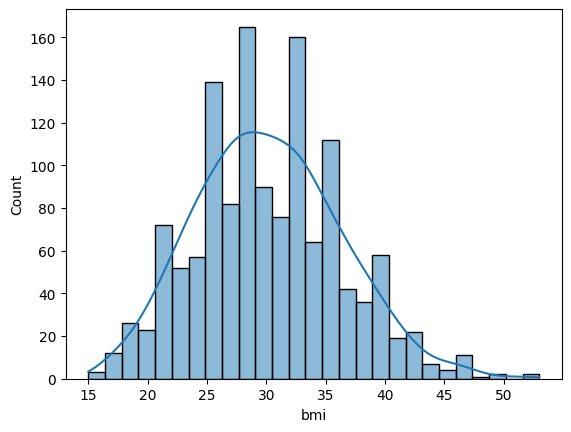

In [89]:
sns.histplot(d_new['bmi'],kde=True)

In [90]:
d_new['bmi_category']=pd.cut(
    d_new['bmi'],
    bins=[0,18.5,24.5,29.9,float('inf')],
    labels=['underweight','Normal','Overweight','Obese'])

In [91]:
d_new.head(10)

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obese
2,28,0,33,3,0,4449,0,1,0,Obese
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,Overweight
5,31,1,25,0,0,3756,0,1,0,Overweight
6,46,1,33,1,0,8240,0,1,0,Obese
7,37,1,27,3,0,7281,1,0,0,Overweight
8,37,0,29,2,0,6406,0,0,0,Overweight
9,60,1,25,0,0,28923,1,0,0,Overweight


In [92]:
d_new=pd.get_dummies(d_new,columns=['bmi_category'],drop_first=True)

In [93]:
d_new.head()

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [94]:
d_new

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [95]:
d_new=d_new.astype(int)

In [96]:
d_new.head(10)

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
5,31,1,25,0,0,3756,0,1,0,0,1,0
6,46,1,33,1,0,8240,0,1,0,0,0,1
7,37,1,27,3,0,7281,1,0,0,0,1,0
8,37,0,29,2,0,6406,0,0,0,0,1,0
9,60,1,25,0,0,28923,1,0,0,0,1,0


In [97]:
d_new.columns

Index(['age', 'is_fem', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [99]:
from sklearn.preprocessing import StandardScaler
cols=['age','bmi','children']
scaler=StandardScaler()
d_new[cols]=scaler.fit_transform(d_new[cols])

In [100]:
d_new.head()

,age,is_fem,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


In [113]:
from scipy.stats import pearsonr

sel_feat={
    'age','bmi','children','is_fem','smoker','charges','region_northwest','region_southeast','region_southwest','bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese'}
cor= {
    feature : pearsonr(d_new[feature],d_new['charges'])[0]
    for feature in sel_feat
}

corr_d = pd.DataFrame(list(cor.items()), columns=['Feature','Pearson Correlation'])
corr_d.sort_values(by = 'Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
3,charges,1.000000
1,smoker,0.787234
8,age,0.298309
2,bmi_category_Obese,0.200348
7,bmi,0.196236
5,region_southeast,0.073577
0,children,0.067390
9,region_northwest,-0.038695
10,region_southwest,-0.043637
6,is_fem,-0.058046


In [114]:
cat_category = {
   'is_fem','smoker','region_northwest','region_southeast','region_southwest','bmi_category_Normal','bmi_category_Overweight','bmi_category_Obese'}

In [120]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha=0.5

d_new['charges_bin'] = pd.qcut(d_new['charges'],q=4,labels=False)
chi2={}
for col in cat_category:
    contin= pd.crosstab(d_new[col],d_new['charges_bin'])
    chi2_stat,p_val,_,_=chi2_contingency(contin)
    decision='reject null' if p_val <alpha else 'ACCEPTED NULL'
    chi2[col]={
    'chi2_statistic':chi2_stat,
    'p_value':p_val,
    'Decision': decision
    }
chi2_d= pd.DataFrame(chi2).T
chi2_d=chi2_d.sort_values(by='p_value')
chi2_d

,chi2_statistic,p_value,Decision
smoker,848.219178,0.0,reject null
region_southeast,15.998167,0.001135,reject null
is_fem,10.258784,0.01649,reject null
bmi_category_Obese,8.515711,0.036473,reject null
region_southwest,5.091893,0.165191,reject null
bmi_category_Overweight,4.25149,0.235557,reject null
bmi_category_Normal,3.708088,0.29476,reject null
region_northwest,1.13424,0.768815,ACCEPTED NULL
